In [15]:
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
df = pd.read_csv("datasets/mnist_test.csv")

In [17]:
X_test = df.iloc[:, 1:]
X_test.shape

(10000, 784)

In [18]:
Y_test = df.iloc[:, 0]
Y_test.shape

(10000,)

In [19]:
def drawImg(sample): 
    img = sample.reshape((28, 28))
    return img

In [20]:
# plt.imshow(drawImg(drawImg(X_test[90])), cmap="gray")
# plt.show()

## Preprocess Data

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
sc = StandardScaler()

In [23]:
X_ = sc.fit_transform(X_test)

In [24]:
X_.shape

(10000, 784)

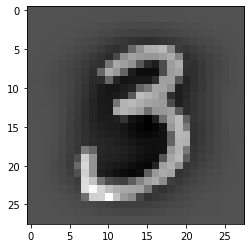

In [25]:
plt.imshow(drawImg(X_[90]), cmap='gray')
plt.show()

## SKLearn PCA

In [26]:
from sklearn.decomposition import PCA

In [27]:
PCA()

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [28]:
#Converting (10000, 784) => (10000, 2)
pca = PCA(n_components=2)

In [29]:
Z_pca = pca.fit_transform(X_)

In [30]:
Z_pca.shape

(10000, 2)

In [31]:
X_

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [32]:
Z_pca

array([[-5.45825623,  6.41365379],
       [ 2.80465161, -8.03215956],
       [-7.41124057, -3.86352803],
       ...,
       [-5.0043902 ,  1.15402922],
       [-1.42077918, -4.42492009],
       [13.14273494, -4.26189114]])

In [33]:
pca.explained_variance_

array([41.39893397, 28.35105778])

## Custom PCA

In [34]:
import numpy as np

In [35]:
covar = np.dot(X_.T, X_)

In [36]:
covar.shape

(784, 784)

In [37]:
from numpy.linalg import svd

In [39]:
u, s, v = svd(covar)

In [41]:
u.shape

(784, 784)

In [42]:
ured = u[:, :2]

In [43]:
ured.shape

(784, 2)

In [45]:
z = np.dot(X_, ured)

In [46]:
z.shape

(10000, 2)

In [51]:
print(z)
print()
print(Z_pca)

[[  5.45831116  -6.41400668]
 [ -2.80443233   8.02885014]
 [  7.41124146   3.86404387]
 ...
 [  5.00435204  -1.15364641]
 [  1.42085442   4.42308066]
 [-13.14268302   4.26280299]]

[[-5.45825623  6.41365379]
 [ 2.80465161 -8.03215956]
 [-7.41124057 -3.86352803]
 ...
 [-5.0043902   1.15402922]
 [-1.42077918 -4.42492009]
 [13.14273494 -4.26189114]]


## Visualize Data

In [61]:
newDataset = np.hstack((z, y.reshape(-1, 1)))

In [58]:
y = Y_test.values

In [60]:
y.shape

(10000,)

In [62]:
dataframe = pd.DataFrame(newDataset, columns=["PCA1", "PCA2", "label"])

In [64]:
dataframe.head()

,PCA1,PCA2,label
0,5.458311,-6.414007,7.0
1,-2.804432,8.028850,2.0
2,7.411241,3.864044,1.0
3,-8.751242,-0.045991,0.0
4,0.065756,-6.296290,4.0


In [65]:
import seaborn as sns 

<Figure size 1080x1080 with 0 Axes>

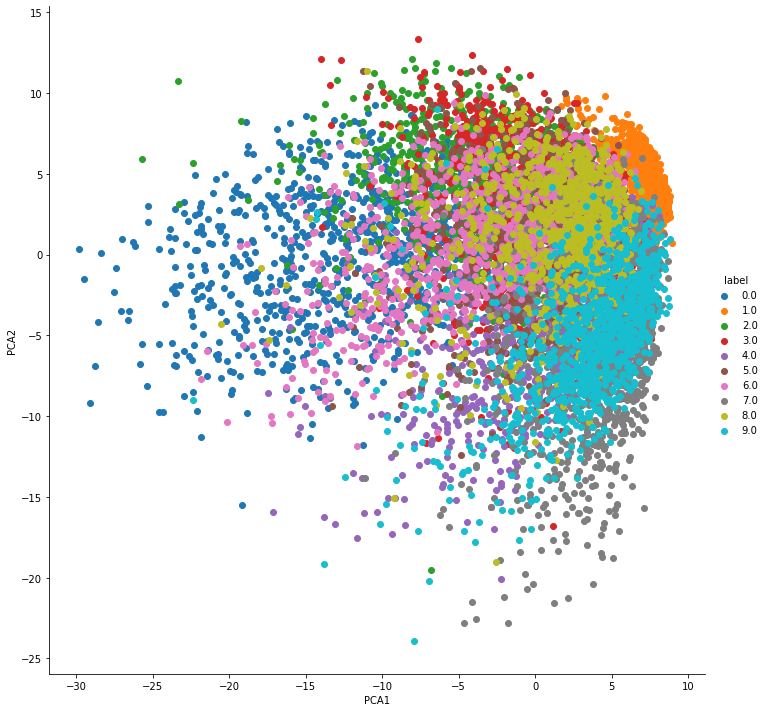

In [75]:
plt.figure(figsize=(15, 15))
fg = sns.FacetGrid(dataframe, hue="label", height=10)
fg.map(plt.scatter, "PCA1", "PCA2")
fg.add_legend()
plt.show()